## TMA4215 - Project #2 ## 
*01.11.2024*

*Group ID:*

In this project we will work with image generation and processing.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from typing import Callable, List
import matplotlib.image

In [3]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)

#### Task 1: Generating artificial images

To start off we will generate artificial fractal images.

#### a)

We begin by defining a generic Newton interation function.

In [4]:
def my_newton(f: Callable, Df: Callable, x0: float, maxiter: int=100, tol: float=1e-6) -> float:
    '''
    Perform Newton method

    Parameters:
    - f: function
    - Df: derivative of function
    - x0: initial guess
    - maxiter: maximum iterations (default 100)
    - tol: tolerance for stopping criteria (default 1e-6)
    '''
    for _ in range(maxiter):
        x1 = x0 - f(x0) / Df(x0)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

#### b)

Now, we want to make a grid-based Newton function that uses `my_newton` as a helper function in order to run the Newton
iteration on a grid of possible starting values from the complex square

$$
\Omega = \left\{ x + iy \ \middle|\ -1 \leq x, y \leq 1 \right\},
$$

sampled equidistantly on n points (including the boundary).

In [8]:
def grid_newton(f: Callable, Df: Callable, n: int, maxiter: int=100) -> np.ndarray:
    '''
    Perform grid-based Newton method

    Uses my_newton as a helper function

    Parameters:
    - f: function
    - Df: derivative of function
    - n: The number of points along each axis of the grid. A grid of size `n x n` will be created.
    - maxiter: maximum iterations (default 100)

    '''
    x = np.linspace(-1, 1, n)
    y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    A = np.zeros(Z.shape, dtype=complex)
    
    for i in range(n):
        for j in range(n):
            A[i, j] = my_newton(f, Df, Z[i, j], maxiter=maxiter)
    return A

#### c)

We want to solve the equation $z^3 = 1, z \in \mathbb{C}$. 

**Analytical solution:**

We are tasked with finding the cube roots of unity, i.e., the solutions to the equation:
$$
z^3 = 1.
$$

We can express $ 1 $ in polar form as:
$$
1 = e^{i \cdot 0} = e^{i \cdot 2k\pi}, \quad \text{for any integer } k.
$$

The general form of a complex number $ z $ is:
$$
z = r e^{i \theta},
$$
where $ r $ is the modulus and $ \theta $ is the argument (angle).

To solve $ z^3 = 1 $, we substitute $ z = r e^{i\theta} $ and get:
$$
r^3 e^{i 3\theta} = e^{i \cdot 2k\pi}.
$$

This gives two conditions:
1. $ r^3 = 1 \Rightarrow r = 1 $ (since $ r > 0 $),
2. $ 3\theta = 2k\pi \Rightarrow \theta = \frac{2k\pi}{3} $.

Thus, the solutions are:
$$
z_k = e^{i \frac{2k\pi}{3}}, \quad \text{for } k = 0, 1, 2.
$$

These give us the following roots:
$$
z_0 = e^{i \cdot 0} = 1,
$$
$$
z_1 = e^{i \cdot \frac{2\pi}{3}} = -\frac{1}{2} + i\frac{\sqrt{3}}{2},
$$
$$
z_2 = e^{i \cdot \frac{4\pi}{3}} = -\frac{1}{2} - i\frac{\sqrt{3}}{2}.
$$

To apply the `grid_newton` method, we need two things: the function and its derivative, as defined below.

In [9]:
def g(z):
    return z**3 - 1

def Dg(z):
    return 3 * z**2

We now define a function that creates a plot where each point $x \in \Omega$ is assigned a color based on the root (that we found analytically) to which the Newton iteration, starting from that point, converges.

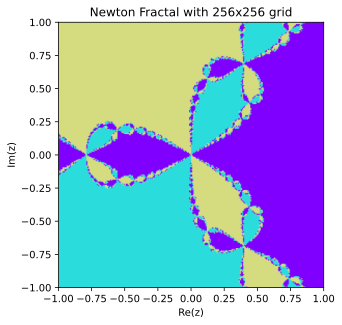

In [13]:
def plot_sol(f: Callable, Df: Callable, roots, n: int=256, maxiter: int=100):
    '''
    Plots the newton fractal for a given funciton and its derivative.

    Parameters:
    - f: function
    - Df: derivative of function
    - n: the resolution of the grid

    '''
    
    A = grid_newton(f, Df, n, maxiter=maxiter)
    
    # Create an empty array for the color plot
    img = np.zeros((n, n, 3))
    
    for i in range(n):
        for j in range(n):
            z = A[i, j]
            distances = [abs(z - root) for root in roots]
            closest_root = np.argmin(distances)
            img[i, j] = plt.get_cmap('rainbow')(closest_root / 3.0)[:3]  # Using a colormap
    
    plt.imshow(img, extent=(-1, 1, -1, 1))
    plt.title(f'Newton Fractal with {n}x{n} grid')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

# Run the plotting function
roots = [1, np.exp(2j * np.pi / 3), np.exp(4j * np.pi / 3)]
plot_sol(g, Dg, roots, n=256)

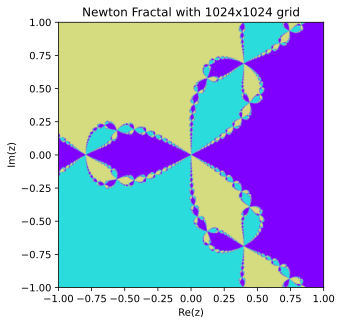

In [14]:
plot_sol(g, Dg, roots, n=1024)

Luckily we have a Macbook with the M3 chip, so we dare to do n=1024 aswell as n=256. For the much larger n-value we observe a much smoother image for the regions where the colors collide.

#### d)

We are now going to consider the equation $h(z) = z^{5} - 1$. Again, defining the function and its derivative.

In [15]:
def h(z):
    return z**5 - 1

def Dh(z):
    return 5*z**4

Now we get the roots and 

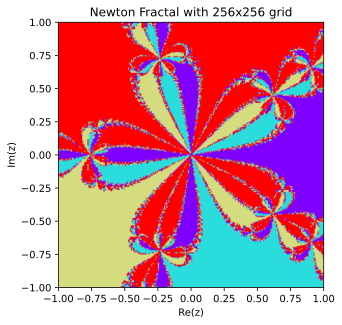

In [17]:
roots1 = [1, np.exp(2j * np.pi / 5), np.exp(4j * np.pi / 5), np.exp(6j * np.pi / 5), np.exp(8j * np.pi / 5)]
plot_sol(h, Dh, roots1, n=256)

In [18]:
def plot_angle(f: Callable, Df: Callable, n: int=256, maxiter: int=100) -> None:
    '''
    Plot the angle between the Newton iteration result at each grid point and the trivial solution

    Parameters:
    - f: function
    - Df: derivative of function
    - n: The number of points along each axis of the grid. A grid of size `n x n` will be created (default is 256)
    - maxiter: The maximum number of iterations for the Newton method (default is 100)
    '''

    z0 = 1
    A = grid_newton(f, Df, n, maxiter=maxiter)
    
    # Compute the angle between each grid point and the trivial solution
    angles = np.angle(A / z0)
    
    # Normalize the angles to the range [0, 1]
    norm_angles = (angles + np.pi) / (2 * np.pi)  # range [0, 1] since angles are in [-π, π]
    
    # Apply the colormap to the normalized angles
    cmap = plt.get_cmap('rainbow')
    img_colors = cmap(norm_angles)
    
    # Plot the colored image
    plt.imshow(img_colors, extent=(-1, 1, -1, 1))
    plt.title(f'Newton Fractal with {n}x{n} grid after {maxiter} iterations')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.show()

Now we plot for $k=5$ and $k=15$ steps.

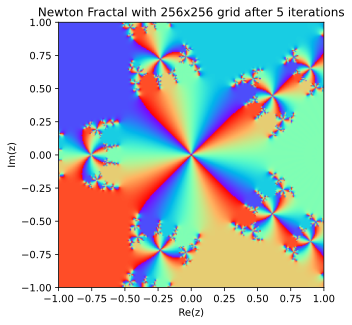

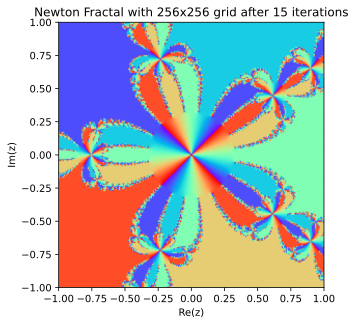

In [21]:
# Plotting for k = 5 iterations
plot_angle(h, Dh, n=256, maxiter=5)

# Plotting for k = 15 iterations
plot_angle(h, Dh, n=256, maxiter=15)


Here we define a function that creates a neat animation for visualizing the different plots, inline in the Jupyter-notebook, for $k=0,1,...,K$ steps.

In [26]:
def animate(k: int) -> List[matplotlib.image.AxesImage]:
    '''
    Update the plot for the given iteration step in the Newton method animation.
    '''

    A = grid_newton(h, Dh, n, maxiter=k)
    angles = np.angle(A / z0)
    
    # Normalize the angles to the range [0, 1]
    norm_angles = (angles + np.pi) / (2 * np.pi)
    
    # Apply colormap
    img_colors = cmap(norm_angles)
    img.set_array(img_colors)
    ax.set_title(f'Newton Fractal - Iteration {k}')
    return [img]


# Setup for animation
n = 256  # Grid resolution
K = 20  # Maximum number of frames/iterations
z0 = 1  # Reference solution to calculate the angle
cmap = plt.get_cmap('rainbow')  # Choose the colormap

# Initialize the figure
fig, ax = plt.subplots()
A_initial = grid_newton(g, Dg, n, maxiter=0)
angles_initial = np.angle(A_initial / z0)
norm_angles_initial = (angles_initial + np.pi) / (2 * np.pi)
img_colors_initial = cmap(norm_angles_initial)
img = ax.imshow(img_colors_initial, extent=(-1, 1, -1, 1))
ax.set_title('Newton Fractal - Iteration 0')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=range(K + 1), blit=True)
plt.close() # ensuring no extra plot under the animation

# Display as an HTML5 video inline in the notebook
HTML(anim.to_jshtml())


#### Task 2: Bézier curves and shapes

Now, we will consider shapes in the plane using Bézier curves and Hermite interpolation.

The Bézier curve $\bf{b} : [0,1] \to \mathbb{R}^d$ is defined as
\begin{align*}
& \bf{b}_n(t; \bf{p}_0, ..., \bf{p}_n) = (1-t) \bf{b}_{n-1} (t; \bf{p}_0, ..., \bf{p}_{n-1}) + t\bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n) \\
& \bf{b}_0(t;\bf{p}_0) = \bf{p}_0
\end{align*}

where $\bf{p}_0, ..., \bf{p}_n \in \mathbb{R}^d, n\in \mathbb{N}$ denote $n+1$ ordered points.

#### a)
Given a Bézier curve $\bf{c}(t) = \bf{b}_n(t; \bf{p}_0, ..., \bf{p}_n)$ we will prove that the following properties hold. 

**1) $\bf{c} (0) = \bf{p}_0$ and $\bf{c} (1) = \bf{p}_n$**

\begin{align*}
\bf{c}(0) & = \bf{b}_n \left(0; \bf{p}_0, ..., \bf{p}_n\right) \\
& = \left(1-0\right) \bf{b}_{n-1} \left(0; \bf{p}_0, ..., \bf{p}_{n-1}\right) + 0\bf{b}_{n-1} \left(0; \bf{p}_1, ..., \bf{p}_n\right) \\
& = \bf{b}_{n-1} \left(0; \bf{p}_0, ..., \bf{p}_{n-1}\right) \\
& = ... \\
& = \bf{b}_0 \left(0; \bf{p}_0\right) \\
& = \bf{p}_0
\end{align*}


\begin{align*}
\bf{c}(1) & = \bf{b}_n \left(1; \bf{p}_0, ..., \bf{p}_n\right) \\
& = \left(1-1\right) \bf{b}_{n-1} \left(1; \bf{p}_0, ..., \bf{p}_{n-1}\right) + 1\bf{b}_{n-1} \left(1; \bf{p}_1, ..., \bf{p}_n\right) \\
& = \bf{b}_{n-1} \left(1; \bf{p}_1, ..., \bf{p}_n\right) \\
& = ... \\
& = \bf{b}_0 \left(1; \bf{p}_n\right) \\
& = \bf{p}_n
\end{align*}

**2) $\bf{c}' (0) = n (\bf{p}_1 - \bf{p}_0)$ and $\bf{c}' (1) = n (\bf{p}_n -\bf{p}_{n-1})$**

First we compute the derivate of $\bf{c}_0$

\begin{align*}
\bf{c}'(t) & = \frac{d}{dt} ((1-t) \bf{b}_{n-1} (t; \bf{p}_0, ..., \bf{p}_{n-1}) + t\bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n)) \\
& = - \bf{b}_{n-1} (t; \bf{p}_0, ..., \bf{p}_{n-1}) + (1-t) \frac{d}{dt} (\bf{b}_{n-1} (t; \bf{p}_0, ..., \bf{p}_{n-1})) + \bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n) + t \frac{d}{dt} (\bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n))
\end{align*}

Now we evaluate the derivative at $t=0$ and $t=1$

\begin{align*}
\bf{c}'(0) & = - \bf{b}_{n-1} (0; \bf{p}_0, ..., \bf{p}_{n-1}) + (1-0) \frac{d}{dt} (\bf{b}_{n-1} (0; \bf{p}_0, ..., \bf{p}_{n-1})) + \bf{b}_{n-1} (0; \bf{p}_1, ..., \bf{p}_n) + 0 \frac{d}{dt} (\bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n)) \\
& = - \bf{b}_{n-1} (0; \bf{p}_0, ..., \bf{p}_{n-1}) + \bf{b}_{n-1} (0; \bf{p}_1, ..., \bf{p}_n) 
\end{align*}

From 1) we know that $\bf{b}_{n-1} (0; \bf{p}_0, ..., \bf{p}_{n-1}) = \bf{p_0}$. We have to look at $\bf{b}_{n-1} (0; \bf{p}_1, ..., \bf{p}_n)$.

\begin{align*}
\bf{b}_{n-1} (0; \bf{p}_1, ..., \bf{p}_n) & = (1-0) \bf{b}_{n-2} (0; \bf{p}_1, ..., \bf{p}_{n-1}) + 0 \bf{b}_{n-2} (0; \bf{p}_2, ..., \bf{p}_n) \\
& = \bf{b}_{n-2} (0; \bf{p}_1, ..., \bf{p}_{n-1}) \\
& = ... \\
& = \bf{b}_0 (0; \bf{p}_1) \\
& = \bf{p}_1
\end{align*}

Moreover, the derivative of a Bézier curve is scaled by the degree of the Bézier curve we´re differentiating. This comes from the fact that $\bf{p}_{i,n}$ are polynomials (specifically the Bernstein polynomials), and it is known that differentiating a polynomial of degree n always indroduces a factor of n.
Thus, 
\begin{align*}
\bf{c}'(0)  = n(\bf{p}_1 - \bf{p}_0)
\end{align*}

Furthermore, 

\begin{align*}
\bf{c}'(1) & = - \bf{b}_{n-1} (1; \bf{p}_0, ..., \bf{p}_{n-1}) + (1-1) \frac{d}{dt} (\bf{b}_{n-1} (1; \bf{p}_0, ..., \bf{p}_{n-1})) + \bf{b}_{n-1} (1; \bf{p}_1, ..., \bf{p}_n) + 1 \frac{d}{dt} (\bf{b}_{n-1} (t; \bf{p}_1, ..., \bf{p}_n)) \\
& = - \bf{b}_{n-1} (1; \bf{p}_0, ..., \bf{p}_{n-1}) + \bf{b}_{n-1} (1; \bf{p}_1, ..., \bf{p}_n) 
\end{align*}

From 1) we know that $\bf{b}_{n-1} (1; \bf{p}_1, ..., \bf{p}_n) = \bf{p}_n$. We have to look at $\bf{b}_{n-1} (1; \bf{p}_0, ..., \bf{p}_{n-1})$.

\begin{align*}
\bf{b}_{n-1} (1; \bf{p}_0, ..., \bf{p}_{n-1}) & = (1-1) \bf{b}_{n-2} (1; \bf{p}_0, ..., \bf{p}_{n-2}) + 1 \bf{b}_{n-2} (1; \bf{p}_1, ..., \bf{p}_{n-1}) \\
& = \bf{b}_{n-2} (1; \bf{p}_1, ..., \bf{p}_{n-1}) \\
& = ... \\
& = \bf{b}_0 (1; \bf{p}_{n-1}) \\
& = \bf{p}_{n-1}
\end{align*}

Thus 
\begin{align*}
\bf{c}'(1)  = n(\bf{p}_n - \bf{p}_{n-1})
\end{align*}

**3) $\bf{c}'' (0) = n (n-1) (\bf{p}_0 - 2\bf{p}_1 + \bf{p}_2)$ and $\bf{c}'' (1) = n (n-1) (\bf{p}_n - 2\bf{p}_{n-1} + \bf{p}_{n-2})$**

#### b)

#### c)

1)

To ensure the composite curve $s(t)$ is continuous ($k = 0$) at $t = 1$, we require the following condition:

$$
\lim_{t \to 1^-} c(t) = \lim_{t \to 1^+} d(t - 1)
$$

This simplifies to:

$$
c(1) = d(0)
$$

Thus, for continuity, the last point of the curve $c(t)$, which is $c(1)$, must coincide with the first point of the curve $d(t)$, which is $d(0)$.

2)

For $s(t)$ to be continuously differentiable ($k = 1$) at $t = 1$, we require that the first derivatives of $c(t)$ and $d(t - 1)$ match at $t = 1$. This can be written as:

$$
\lim_{t \to 1^-} \frac{d}{dt}c(t) = \lim_{t \to 1^+} \frac{d}{dt}d(t - 1)
$$

By applying the chain rule to the right-hand side:

$$
\frac{d}{dt}d(t - 1) = \frac{d}{du}d(u) \cdot \frac{d}{dt}(t - 1) = \frac{d}{du}d(u)
$$

where $u = t - 1$. Thus, the condition for continuous differentiability simplifies to:

$$
\frac{d}{dt}c(1) = \frac{d}{du}d(0)
$$

Therefore, for continuous differentiability, the tangent vector at the end of $c(t)$ must equal the tangent vector at the beginning of $d(t)$.

3)

To satisfy $s \in C^1$, we need both continuity and continuous differentiability. 

We are given that $n = 3$, and the points $\mathbf{d}_0$, $\mathbf{d}_1$, and $\mathbf{d}_2$ are interpolated by the piecewise Bézier curve $s(t)$. 

#### Conditions for Interpolation:

The curve must pass through the given points $\mathbf{d}_0$, $\mathbf{d}_1$, and $\mathbf{d}_2$:
$$
s(0) = \mathbf{d}_0, \quad s(1) = \mathbf{d}_1, \quad s(2) = \mathbf{d}_2
$$
This gives us 3 conditions.

#### Continuity at $t = 1$:
To ensure continuity at $t = 1$, we must have:
$$
c(1) = d(0)
$$
where $c(t)$ and $d(t-1)$ represent the two Bézier curves for $t \in [0,1]$ and $t \in [1,2]$ respectively.

#### Continuous Differentiability at $t = 1$:
For continuous differentiability, the derivatives at $t = 1$ must also match:
$$
\frac{d}{dt}c(1) = \frac{d}{dt}d(0)
$$
Thus, the tangent vectors at the connecting point must be equal.

#### Degrees of Freedom:
Each Bézier curve has 4 control points in $\mathbb{R}^d$ since $n = 3$. Hence, we have 8 total control points, $\mathbf{p}_0, \mathbf{p}_1, \mathbf{p}_2, \mathbf{p}_3$ for the first curve $c(t)$ and $\mathbf{q}_0, \mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3$ for the second curve $d(t-1)$.

However, due to the conditions imposed:

- The interpolation conditions $s(0) = \mathbf{d}_0$, $s(1) = \mathbf{d}_1$, and $s(2) = \mathbf{d}_2$ fix 3 of the control points.
- The continuity condition at $t = 1$ fixes another point.
- The continuous differentiability condition at $t = 1$ fixes one more.

Thus, we have used 5 degrees of freedom, leaving us with:
$$
8 - 5 = 3 \quad \text{degrees of freedom}.
$$

Meaning we can choose 3 of the control points freely.

4)

To have a $C^1$ function $s(t)$ that is periodic, i.e., $s(0) = s(2)$, we need to add the two following conditions:

- **Continuity Condition:**
$$
s(0) = s(2)
$$
This means that the endpoints of the curve must coincide.

- **Continuous Differentiability:**
$$
\frac{d}{dt}s(0) = \frac{d}{dt}s(2)
$$
This ensures that the derivatives at $t = 0$ and $t = 2$ match, meaning the tangent vectors at both endpoints must be equal.

Thus, the additional condition for periodicity in $C^1$ is that both the function and its derivative must be equal at $t = 0$ and $t = 2$.

#### d)
Given a number $m$ of segements and $4m$ points $\bf{p}_{0,i}, \bf{p}_{1,i}, \bf{p}_{2,i}, \bf{p}_{3,i}\in \mathbb{R}^d$ for $ i = 1, ..., m$, the *periodic composite Bézier curve* $\mathbb{B} : [0,m] \to \mathbb{R}^d$ is defined by

$$ \bf{B}(t) = b_3 (t-i+1; \bf{p}_{0,i}, \bf{p}_{1,i}, \bf{p}_{2,i}, \bf{p}_{3,i}) \text{ for } i-1 \leq t < i \text{ and each } i = 1, ..., m$$ 

which further is periodic, i.e $\bf{B}(0) = \bf{B}(m)$.

We will now implement a function **composite_Bezier(P,t)** that evaluates $\bf{B}(t), t \in [0,m]$, where $P= (\bf{p}_{i,j})_{j=0, i=1}^{3,m}$ denotes a matrix of control points.

In [1]:
def composite_Bezier(P,t):
    """ 
    Evaluate the periodic composite Bézier curve B(t) for t in [0, m]

    Input: 
    - P = matrix of control points
    - t = parameter in [0, m] indicating the point to evaluate

    Output:
    - b3 = the evaluated point B(t) on the composite Bézier curve
    """

    m = P.shape[1]
    t = t % m 

    local_t = t - int(t)    

    p0 = P[int(t),0]
    p1 = P[int(t),1]
    p2 = P[int(t),2]
    p3 = P[int(t),3]


    b3 = (1-local_t)**3 * p0 + 3*(1-local_t)**2 * local_t * p1 + 3*(1-local_t) * local_t**2 * p2 + local_t**3 * p3

    return b3

In [2]:
import numpy as np
# 3-segment cubic composite B spline 
P = np.array([[(-1,0), (-1,1/3), (-1/3, 1), (0,1)],
              [(0,1), (1/3,1), (1,1/3), (0,1)],
              [(1,0), (1, -1/3), (1/3, -1), (0,-1)]
            ])

print(composite_Bezier(P, 1))

[0. 1.]


#### e)

#### f)

#### g)

#### Task 3: Seamless cloning

Now we want to smoothly embed one image into another, using seamless cloning.

#### a)

#### b)

#### c)

#### d)

#### e)

#### References
- Plonka, Gerlind, Daniel Potts, Gabriele Steidl, and Manfred Tasche (2018). *Numerical Fourier Analysis*. Springer International Publishing.